## Data Preprocessing

The dataset is obtained from the Seventeenth release of Sloan Digital Sky Surveys (SDSS - DR17). The dataset consists of 100,000 data points with 18 attributes including the class of astronomical objects.

In [185]:
import pandas as pd # For Dataframe manupulation
import numpy as np # For arrays manipulation

#### Data Cleansing

In [186]:
df = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification.csv") # Importing astronomical objects dataset
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [187]:
# Handling missing values

null_counts = df.isnull().sum() # To Count the null values in each column

print(null_counts) # to print the null counts for each column

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


There are no null values in the dataset.

In [188]:
# Handling duplicate values

# To Count the duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

duplicate_count

0

There are no duplicate rows in the dataset

Outliers were not removed from the dataset , because there could be data with a wide range of spectral features due to the difference of each astronomical object. Otherwise there could be loss of important information, Biasing of the model and Overfitting.

#### Data Reduction

In [189]:
# To select a subset of columns
columns_to_keep = ['alpha', 'delta', 'u','g','r','i','z','redshift','class']
df = df[columns_to_keep]

df

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


In [190]:
# Saving the pre transformed dataset for exploratory analysis

df.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_exp.csv",index = False)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


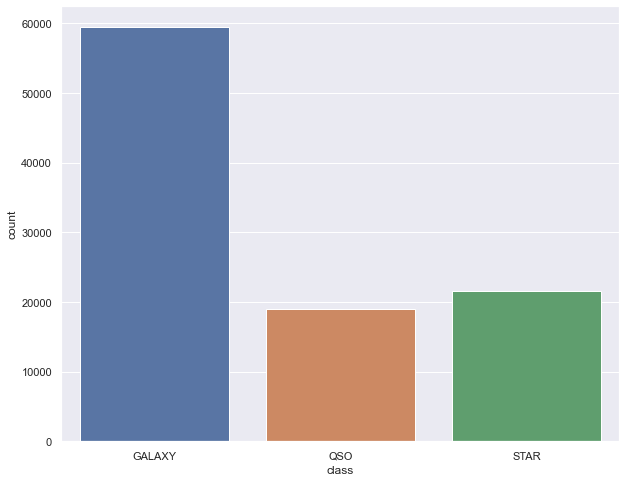

In [191]:
# visualizing distribution of each class

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(df['class'])
plt.show()

In [192]:
# to obtaing number of objects from each class
value_counts = df['class'].value_counts()

print(value_counts)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


According to the above analysis, it shows that there is a imbalance in the dataset considering the class feature.As a solution the dataset is undersampled with the RandomUnderSampler function.

In [193]:

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# separating the features and target variable
x = df.drop('class', axis=1)
y = df['class']

# applying RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x, y)

# creating a new DataFrame with the undersampled dataset
dfr = pd.concat([x_resampled, y_resampled], axis=1)

# replacing the original dataset with the undersampled dataset
df = dfr

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


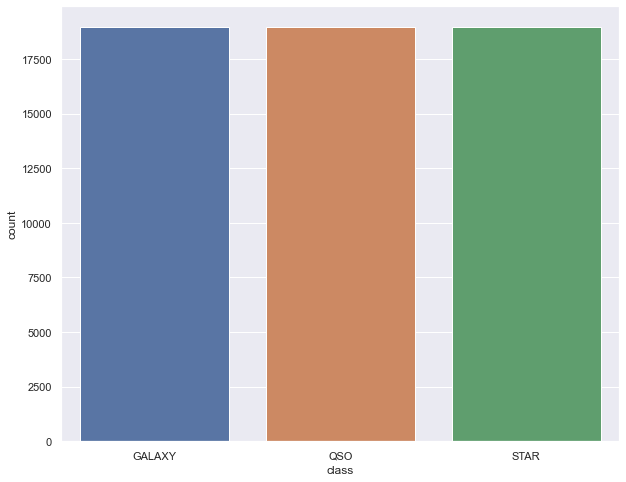

In [194]:
# checking the status of the dataset after oversampling

# visualizing distribution of each class after oversampling

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(dfr['class'])
plt.show()

In [195]:
# obtaing number of objects from each class after oversampling
value_counts = dfr['class'].value_counts()

print(value_counts)

GALAXY    18961
QSO       18961
STAR      18961
Name: class, dtype: int64


#### Data Transforming

In [196]:
from sklearn.preprocessing import LabelEncoder

# To create a LabelEncoder object
le = LabelEncoder()

# To encode categorical variables
dfr['class'] = le.fit_transform(df['class'])
dfr

,alpha,delta,u,g,r,i,z,redshift,class
0,156.047223,5.241276,20.36820,18.60968,17.43278,16.97599,16.65575,0.183802,0
1,346.253597,21.284406,26.36151,23.50848,22.75484,21.07888,20.27420,0.647371,0
2,352.904931,2.979195,25.37777,22.53456,21.01123,19.81937,19.28343,0.639540,0
3,212.493976,14.713369,24.59636,22.35642,20.87185,20.00913,19.55692,0.510497,0
4,203.364028,47.055917,19.80453,18.40865,17.71760,17.37854,17.15154,0.117507,0
...,...,...,...,...,...,...,...,...,...
56878,126.820305,42.405084,17.67958,17.38853,17.70882,17.97536,18.24699,-0.000135,2
56879,142.716996,15.561711,21.63020,21.50921,20.70538,19.50851,19.14171,0.000686,2
56880,353.040477,27.482237,24.83445,23.04728,21.28788,20.05081,19.37506,-0.000264,2
56881,357.091554,12.882284,21.14859,20.28658,20.02717,19.93353,19.82408,-0.000334,2


In [197]:
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


#### Data Normalization

##### Normalization using min-max method

In [198]:
# Copying df dataset for min_max normalization
dfn = dfr.copy()

In [199]:
# Selecting the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the minimum and maximum values of each column
min_vals = dfn[cols_to_normalize].min()
max_vals = dfn[cols_to_normalize].max()

# Normalizing each column using the min-max method
dfn[cols_to_normalize] = (dfn[cols_to_normalize] - min_vals) / (max_vals - min_vals)

In [200]:
dfn

,alpha,delta,u,g,r,i,z,redshift,class
0,0.433447,0.227447,0.430200,0.418887,0.385357,0.331079,0.367261,0.027598,0
1,0.961815,0.386947,0.705309,0.671867,0.654831,0.512050,0.555936,0.093622,0
2,0.980291,0.204957,0.660153,0.621572,0.566546,0.456495,0.504275,0.092507,0
3,0.590249,0.321618,0.624284,0.612373,0.559488,0.464865,0.518536,0.074128,0
4,0.564887,0.643166,0.404326,0.408505,0.399778,0.348835,0.393113,0.018156,0
...,...,...,...,...,...,...,...,...,...
56878,0.352259,0.596928,0.306785,0.355825,0.399333,0.375160,0.450233,0.001401,2
56879,0.396418,0.330052,0.488129,0.568622,0.551060,0.442784,0.496885,0.001518,2
56880,0.980668,0.448566,0.635213,0.648050,0.580554,0.466704,0.509053,0.001383,2
56881,0.991921,0.303413,0.466022,0.505484,0.516719,0.461531,0.532466,0.001373,2


In [201]:
# Save the normalized dataset to a new CSV file
dfn.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm.csv",index = False)

##### Normalization using Z-Score method

In [202]:
# Copying df dataset for Z-Score normalization
dfz = dfr.copy()

In [203]:
# Select the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the mean and standard deviation of each column
mean_vals = dfz[cols_to_normalize].mean()
std_vals = dfz[cols_to_normalize].std()

# Normalizing each column using the z-score method
dfz[cols_to_normalize] = (dfz[cols_to_normalize] - mean_vals) / std_vals


In [204]:
dfz

,alpha,delta,u,g,r,i,z,redshift,class
0,-0.216724,-0.979412,-0.645387,-0.961850,-1.253654,-1.296910,-1.314718,-0.579519,0
1,1.726570,-0.168447,2.127090,1.548103,1.658202,1.013583,0.697736,-0.072913,0
2,1.794525,-1.093758,1.672016,1.049105,0.704221,0.304305,0.146705,-0.081470,0
3,0.359979,-0.500607,1.310540,0.957833,0.627962,0.411166,0.298810,-0.222494,0
4,0.266701,1.134278,-0.906138,-1.064850,-1.097820,-1.070219,-1.038977,-0.651968,0
...,...,...,...,...,...,...,...,...,...
56878,-0.515328,0.899183,-1.889130,-1.587520,-1.102624,-0.734127,-0.429727,-0.780532,2
56879,-0.352916,-0.457724,-0.061592,0.523755,0.536882,0.129248,0.067885,-0.779635,2
56880,1.795910,0.144847,1.420679,1.311802,0.855585,0.434638,0.197666,-0.780673,2
56881,1.837299,-0.593166,-0.284382,-0.102672,0.165813,0.368593,0.447395,-0.780749,2


In [205]:
# Saving the normalized dataset to a new CSV file
dfz.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_zc.csv",index = False)